In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import numpy as np
import qutip as qt 
import sys
import os 

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from ECD_control.ECD_optimization.batch_optimizer import BatchOptimizer
from ECD_control.ECD_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from ECD_control.ECD_pulse_construction.ECD_pulse_construction import *
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2025-05-09 11:36:12.051153: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-09 11:36:12.401946: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-09 11:36:12.797206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746801373.323675    6687 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746801373.487097    6687 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746801373.819705    6687 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin


Need tf version 2.3.0 or later. Using tensorflow version: 2.19.0



2025-05-09 11:36:23.640482: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5632129106760190936
 xla_global_id: -1]

In [4]:
#The target oscillator state.
N =40
Fock = 3
psi_t = qt.basis(N,3) #target state

In [5]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
'N_blocks' : 7, #circuit depth
'N_multistart' : 200, #Batch size (number of circuit optimizations to run in parallel)
'epochs' : 200, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.995, #terminal fidelitiy
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))], #qubit tensor oscillator, start in |g> |0>
'target_states' : [qt.tensor(qt.basis(2,1), psi_t)], #end in |e> |target>.
'name' : 'Fock %d' % Fock, #name for printing and saving
'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
}
#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

In [7]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()


Need tf version 2.3.0 or later. Using tensorflow version: 2.19.0

optimization_type: state transfer
N_multistart: 200
N_blocks: 7
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
final_disp_scale: 1.0
theta_scale: 3.141592653589793
include_final_displacement: False
real_part_only: False
name: Fock 3
comment: 
N_cav: 40
filename: Fock 3.h5

Best circuit parameters found:
betas:         [ 0.15815+2.95292j  1.05623+1.77072j  0.00784-2.3275j  -0.70515-0.25304j
 -0.62476-1.13407j -0.85677+0.22841j -0.55785+0.18036j]
final_disp:    [0.+0.j]
phis (deg):    [-108.10934 -133.68306   -1.23322 -112.31853  164.17601  -37.36161
 -126.1699 ]
thetas (deg):  [-111.96956   24.26926 -114.37539  132.39232 -173.81361  167.49802
   65.90079]
Max Fidelity:  0.189644




In [9]:
#run optimizer.
#note the optimizer can be stopped at any time by interrupting the python console,
#and the optimization results will still be saved and part of the opt object.
#This allows you to stop the optimization whenever you want and still use the result.
opt.optimize()

Start time: 2025-05-09 14:32:35
 Epoch: 13 / 200 Max Fid: 0.996135 Avg Fid: 0.815022 Max dFid: 0.079470 Avg dFid: 0.010476 Elapsed time: 0:01:19.341072 Remaing time: 0:19:01.290799

 Optimization stopped. Term fidelity reached.

optimization_type: state transfer
N_multistart: 200
N_blocks: 7
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
final_disp_scale: 1.0
theta_scale: 3.141592653589793
include_final_displacement: False
real_part_only: False
name: Fock 3
comment: 
N_cav: 40
filename: Fock 3.h5

Best circuit parameters found:
betas:         [ 1.72135+0.73711j  0.02522-1.6181j   0.33727-1.089j   -1.68841+1.34652j
  0.17315+0.5109j   0.30625+0.11182j  0.00002+0.00032j]
final_disp:    [0.+0.j]
phis (deg):    [ 140.76236  -52.80664   54.52727  132.14691 -140.63847  -34.96248
  123.96674]
thetas (deg):  [ -90.0819   -66.48063   52.73328 -156.68594  132.42514 -103.08749
  -92.5549 ]
Max Fidelity:  0.996332


all data saved a

'2025-05-09 14:32:35'

In [10]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 200
N_blocks: 7
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
final_disp_scale: 1.0
theta_scale: 3.141592653589793
include_final_displacement: False
real_part_only: False
name: Fock 3
comment: 
N_cav: 40
filename: Fock 3.h5

Best circuit parameters found:
betas:         [ 1.72135+0.73711j  0.02522-1.6181j   0.33727-1.089j   -1.68841+1.34652j
  0.17315+0.5109j   0.30625+0.11182j  0.00002+0.00032j]
final_disp:    [0.+0.j]
phis (deg):    [ 140.76236  -52.80664   54.52727  132.14691 -140.63847  -34.96248
  123.96674]
thetas (deg):  [ -90.0819   -66.48063   52.73328 -156.68594  132.42514 -103.08749
  -92.5549 ]
Max Fidelity:  0.996332




In [13]:
#can also get the best circuit parameters directly, could save this to a .npz file.
best_circuit =  opt.best_circuit()
betas = best_circuit['betas']
phis = best_circuit['phis']
thetas = best_circuit['thetas']
print(best_circuit)
np.savez('fock_%d_F_%.2f_test.npz' % (Fock, 99), betas = betas, phis = phis, thetas = thetas) 

{'fidelity': np.float32(0.9963319), 'betas': array([ 1.7213486e+00+7.3711145e-01j,  2.5224486e-02-1.6181049e+00j,
        3.3726805e-01-1.0890026e+00j, -1.6884073e+00+1.3465215e+00j,
        1.7314637e-01+5.1089859e-01j,  3.0625358e-01+1.1181692e-01j,
        1.5837992e-05+3.2449176e-04j], dtype=complex64), 'final_disp': array([0.+0.j], dtype=complex64), 'phis': array([ 2.4567668, -0.9216497,  0.9516804,  2.3063986, -2.4546044,
       -0.6102104,  2.1636279], dtype=float32), 'thetas': array([-1.5722258, -1.1603059,  0.9203694, -2.7346857,  2.3112547,
       -1.7992163, -1.6153878], dtype=float32)}


In [12]:
#Analysis of the results. Can load the .h5 file.
#all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I  recommend using "HDFview" software to understand data structure
#filename = opt.filename
filename = 'Fock %d.h5' % Fock
analysis = OptimizationAnalysis(filename)
analysis.print_info() #we can print info of best circuit

KeyError: "Unable to synchronously open object (object 'alphas' doesn't exist)"

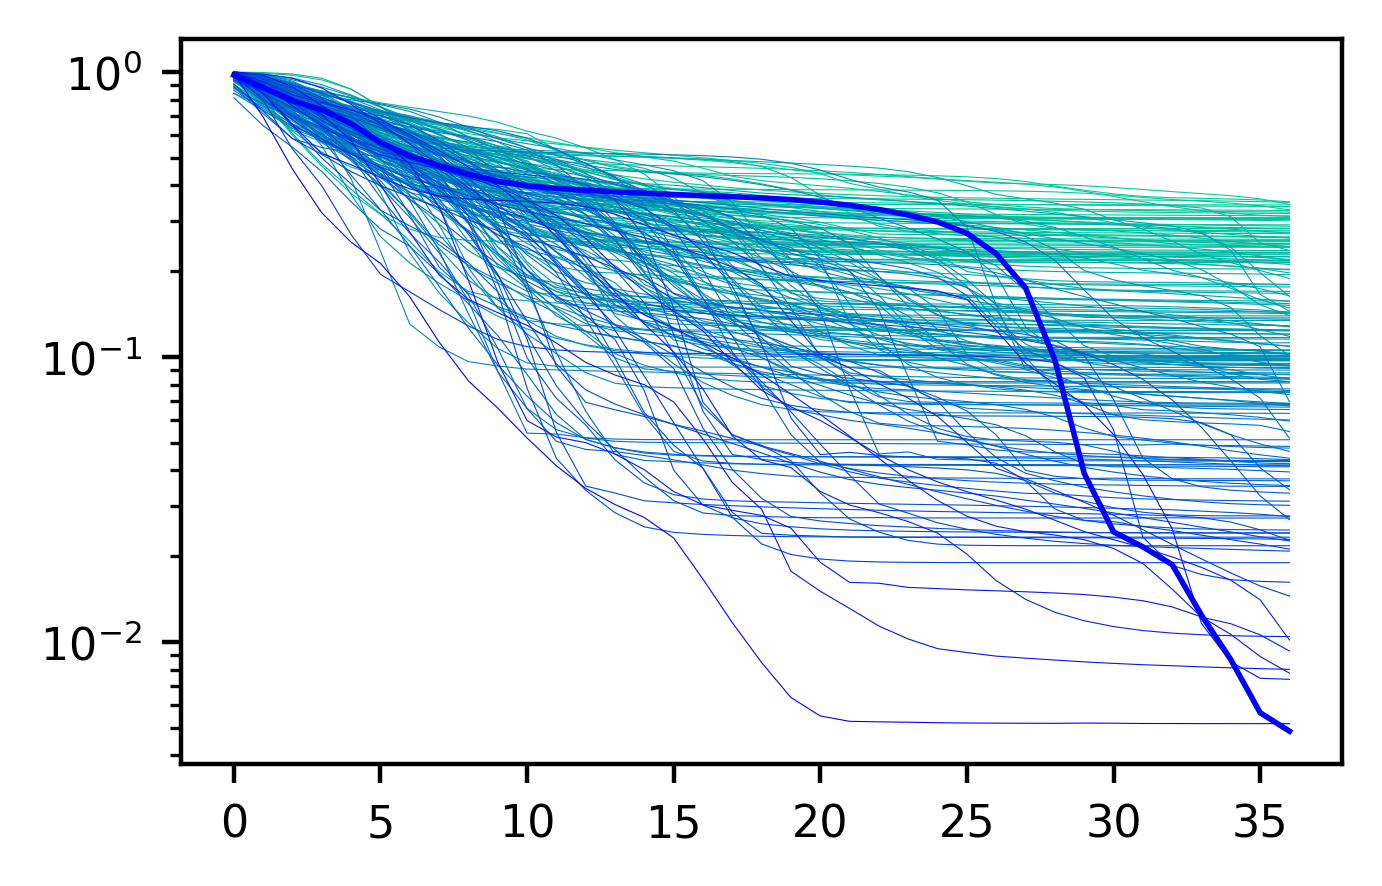

In [10]:
#We can plot the fidelities of the different parallel optimizations. 
# x axis is epoch
analysis.plot_fidelities()

In [11]:
#Can also get the "best circuit" from a loaded analysis object
best_circuit = analysis.best_circuit()
betas = best_circuit['betas']
phis = best_circuit['phis']
thetas = best_circuit['thetas']
print(best_circuit)

{'fidelity': 0.99513197, 'betas': array([ 0.06015637+1.5727955e+00j, -0.62582606+5.0974530e-01j,
        1.3047355 -1.2585883e-01j,  0.8836812 +1.5156528e+00j,
        0.02054233+4.5576090e-01j, -0.32019562+7.5487232e-01j,
       -0.00157556+7.5748231e-04j], dtype=complex64), 'alphas': array([0.+0.j], dtype=complex64), 'phis': array([ 0.       , -1.5770257,  1.5780823,  1.5582983, -1.5567687,
        1.559355 , -3.125538 ], dtype=float32), 'thetas': array([ 1.5720704,  2.4896877, -0.9203582,  2.141577 ,  1.0751135,
        1.0203354, -1.5675209], dtype=float32)}


In [12]:
#Now, we can take the parameters found (betas, phis, and thetas)
#and use them to produce a ECD oscillator and qubit pulse.
#This requies us to specify the calibrated experimental parameters.

#The following parameters for the oscillator will be used to build the oscillator pulse.
#Here, assume that a gaussian displacement pulse to alpha=1.0 has been calibrated.
storage_params = {
        "chi_kHz": 33, #dispersive shift in kHz
        "chi_prime_Hz": 1, #second order dispersive shift in Hz
        "Ks_Hz": 0, #Kerr correction not implemented here.
        "unit_amp": 0.01, #DAC amplitude (at maximum of pulse) for gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement pulse sigma
        "chop": 4, #oscillator displacement pulse chop (number of sigmas to include in gaussian pulse)
    }

#In a similar way, the qubit pulse parameters will be specified by a calibrated pi pulse.
#unit_amp is the DAC amplitude (at maximum of pulse) for a calibrated gaussian pi pulse, with sigma and chop specified
qubit_params = {'unit_amp': 0.5, 'sigma': 6, 'chop': 4} #parameters for qubit pi pulse.


#creating the "Fake storage" and "Fake qubit" objects which are used
#for pulse cration
storage = FakeStorage(**storage_params)
qubit = FakeQubit(**qubit_params)

#The maximum displacement used during the ECD gates.
alpha_CD = 30
#Small delay to insert between oscillator and qubit pulses to ensure timing is okay.
buffer_time = 4

In [13]:
#From these calibrations, the storage and qubit objects calculate the
#conversion between DAC amplitude, and drive amplitude in MHz.
#so, [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz 
#and [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz.
#These parameters also represent the maximum drive amplitude,
#since the DAC max amplitude is 1 (assuming amplifiers don't saturate.)
print('Maximum oscillator drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage.epsilon_m_MHz)
print('Maximum qubit drive amplitude: |Omega|/2*pi < %.3f MHz' % qubit.Omega_m_MHz)

Maximum oscillator drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum qubit drive amplitude: |Omega|/2*pi < 40.468 MHz


In [14]:
#generating the oscillator and qubit pulses (epsilon and Omega)
#set 'chi_prime_correction = True' to correct for linear part of chi'
#final_disp = True will implement final ECD gate as a gaussian displacement instead of full ECD gate.
#This option is useful if the qubit and oscillator are disentangled after the gate.
pulse_dict = conditional_displacement_circuit(betas, phis, thetas, storage, qubit,
                     alpha_CD,buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=True, pad=True)

#The dictionary will contain the pulses, in DAC units.
#Also, the displacements used for each ECD gate (the "alphas")
cavity_dac_pulse, qubit_dac_pulse,alphas = pulse_dict['cavity_dac_pulse'], pulse_dict['qubit_dac_pulse'], pulse_dict['alphas']
print('alphas:')
print(alphas)

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


alphas:
[30.1799891752502, 30.131083638271857, 30.1974379074359, 30.10638915560334, 23.836287915651713, 30.131542727348283]


Text(0.5, 0, 'ns')

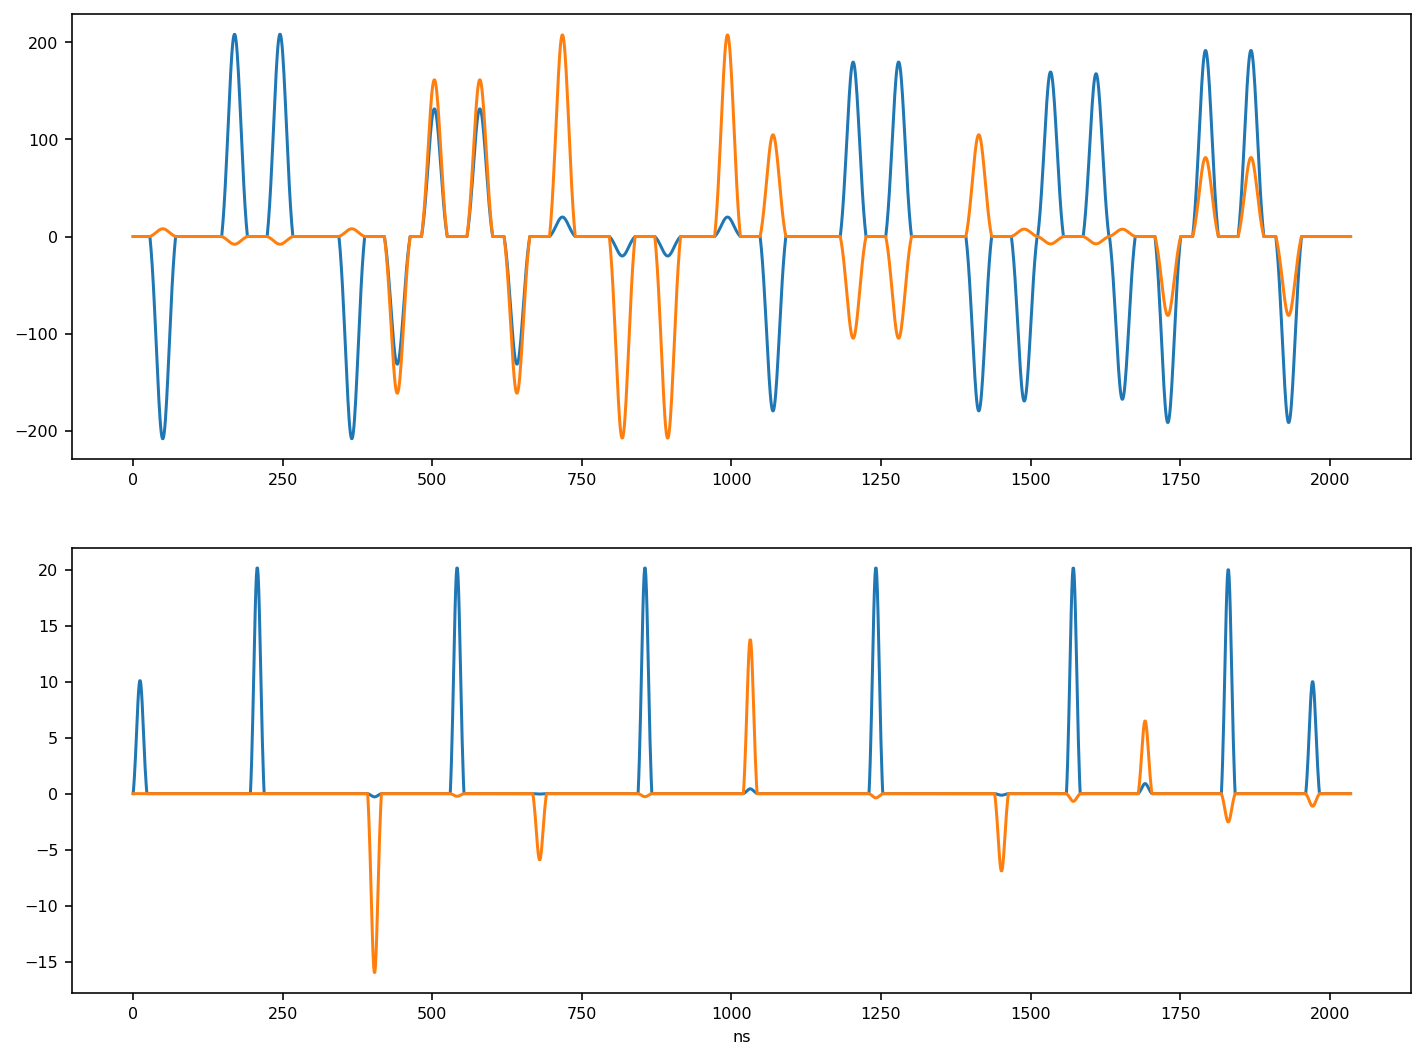

In [16]:
#plotting the pulse, in units of MHz. It could also be fed into a time-domain simulation.
fig, axs = plt.subplots(2,1)
axs[0].plot(np.real(storage.epsilon_m_MHz*cavity_dac_pulse))
axs[0].plot(np.imag(storage.epsilon_m_MHz*cavity_dac_pulse))
axs[1].plot(np.real(qubit.Omega_m_MHz*qubit_dac_pulse))
axs[1].plot(np.imag(qubit.Omega_m_MHz*qubit_dac_pulse))
plt.xlabel('ns')